In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city=pd.read_csv('data/city_data.csv')
ride=pd.read_csv('data/ride_data.csv')
city.head(),ride.head()
# Combine the data into a single dataset
merge_data=pd.merge(ride,city, how="left", on="city")
merge_data.head()
# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
mergetype=merge_data[["city","driver_count","type"]]
mergeduplicates=mergetype.drop_duplicates()
mergesort=mergeduplicates.sort_values("city").reset_index().drop("index",axis=1)
mergesort.head()

,city,driver_count,type
0,Amandaburgh,12,Urban
1,Barajasview,26,Urban
2,Barronchester,11,Suburban
3,Bethanyland,22,Suburban
4,Bradshawfurt,7,Rural


In [3]:
avgfare=merge_data.groupby(["city"]).mean()["fare"].reset_index()
avgfare.head()

,city,fare
0,Amandaburgh,24.641667
1,Barajasview,25.332273
2,Barronchester,36.422500
3,Bethanyland,32.956111
4,Bradshawfurt,40.064000


In [4]:
cityride=merge_data.groupby(["city"]).count()["ride_id"].reset_index()
cityride.head()

,city,ride_id
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [5]:
citydrivers=merge_data.groupby(["city"]).mean()["driver_count"].reset_index()
citydrivers.head()

,city,driver_count
0,Amandaburgh,12.0
1,Barajasview,26.0
2,Barronchester,11.0
3,Bethanyland,22.0
4,Bradshawfurt,7.0


In [6]:
df=pd.DataFrame({"city":avgfare["city"],
    "Average":avgfare["fare"],
              "total rides":cityride["ride_id"],
              "total drivers":citydrivers["driver_count"],
                "type":mergesort["type"]})
df.head()

,city,Average,total rides,total drivers,type
0,Amandaburgh,24.641667,18,12.0,Urban
1,Barajasview,25.332273,22,26.0,Urban
2,Barronchester,36.422500,16,11.0,Suburban
3,Bethanyland,32.956111,18,22.0,Suburban
4,Bradshawfurt,40.064000,10,7.0,Rural


## Bubble Plot of Ride Sharing Data

In [7]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [8]:
Urban=df[df['type']=='Urban']
Suburban=df[df['type']=='Suburban']
Rural=df[df['type']=='Rural']

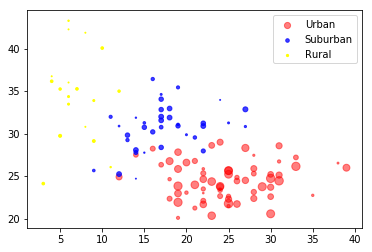

In [26]:
plt.scatter(Urban["total rides"],Urban["Average"],s=Urban["total drivers"],c="red", alpha=.5, label="Urban")
plt.scatter(Suburban["total rides"],Suburban["Average"],s=Suburban["total drivers"],c="blue", alpha=.75, label="Suburban")
plt.scatter(Rural["total rides"],Rural["Average"],s=Rural["total drivers"],c="yellow", alpha=1, label="Rural")

plt.legend(loc="upper right")

In [10]:
# Show plot
plt.show()

## Total Fares by City Type

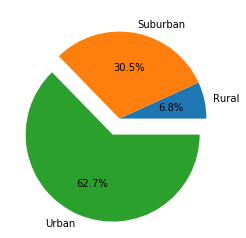

In [11]:
# Calculate Type Percents
Totalfare=merge_data.groupby(["type"])["fare"].sum()
labels = ["Rural","Suburban","Urban"]
explode = (0,0,0.2)
Totalfare.head()
# Build Pie Chart
plt.pie(Totalfare, autopct="%1.1f%%", labels=labels, explode=explode)
# Save Figure
plt.savefig("Total fares by city type")

In [12]:
Totalfare.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [13]:
# Show Figure
plt.show()

## Total Rides by City Type

([<matplotlib.patches.Wedge at 0x22df5213cf8>,
 [Text(2.071358736719902, 0.3456486421413123, 'Rural'),
  Text(0.4418649348526167, 1.0073506734735889, 'Suburban'),
  Text(-0.7110324956192298, -1.0883164935686174, 'Urban')],
 [Text(1.5781780851199252, 0.26335134639338076, '5.3%'),
  Text(0.24101723719233634, 0.5494640037128666, '26.3%'),
  Text(-0.43755845884260286, -0.6697332268114566, '68.4%')])

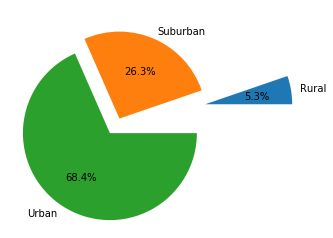

In [28]:
# Calculate Ride Percents
Totalrides=merge_data.groupby(["type"])["ride_id"].count()
Labels = ["urban","Suburban","Rural"]
explode = [1,0,0.2]
plt.pie(Totalrides, autopct="%1.1f%%", labels=labels, explode=explode)
# Build Pie Chart

# Save Figure


In [15]:
Totalrides.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [16]:
# Show Figure
plt.show()

## Total Drivers by City Type

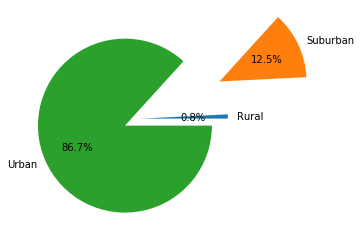

In [27]:
# Calculate Driver Percents
Totaldrivers=merge_data.groupby(["type"])["driver_count"].sum()
Totaldrivers.head()
labels=["Rural","Suburban","Urban"]
explode = (0,1,0.2)
plt.pie(Totaldrivers,autopct="%1.1f%%",labels=labels,explode=explode)
# Build Pie Charts

# Save Figure
plt.savefig("Total Drivers by city type")

In [23]:
Totaldrivers.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [ ]:
# Show Figure
plt.show()